In [1]:
%matplotlib inline

import matplotlib
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 14, 
                            'font.family': 'sans',
                            'axes.titlesize' : 24,
'axes.labelsize' : 20,
'lines.linewidth' : 3,
'lines.markersize' : 10,
'xtick.labelsize' : 16,
'ytick.labelsize' : 16,
                            })

import numpy as np
import pandas as pd

import datetime
import subprocess


In [2]:
genFileName = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-%s.csv'

confirmedFileName = genFileName % "Confirmed"
infoConf = pd.read_csv(confirmedFileName)
del infoConf['Lat']
del infoConf['Long']

deathFileName = genFileName % "Deaths"
infoD = pd.read_csv(deathFileName)
del infoD['Lat']
del infoD['Long']

recovFileName = genFileName % "Recovered"
infoRec = pd.read_csv(recovFileName)
del infoRec['Lat']
del infoRec['Long']



In [3]:
infoConf.rename(columns={'Country/Region': 'CountryOrRegion'}, inplace= True)
infoD.rename(columns={'Country/Region': 'CountryOrRegion'}, inplace= True)
infoRec.rename(columns={'Country/Region': 'CountryOrRegion'}, inplace= True)
#infoConf.rename(columns={'Province/State': 'ProvState'}, inplace= True)

# infoConf.describe()

In [4]:

# sumDF = infoConf.groupby( ['CountryOrRegion'] ).count()
# sumDF.rename(columns={'Province/State': 'ProvState'}, inplace= True)

# for c in sumDF.index:
#     print(c)
# for c in sumDF.query('ProvState>0').index:
 #   print( c )
 #   print( infoConf[infoConf['CountryOrRegion']==c][['CountryOrRegion','ProvState']] )


In [5]:
def plotOne( info, selection, title, name, yMax=1.e5):
    resDF = info.groupby( ['CountryOrRegion'] ).sum().T
    resDFSel = resDF.loc[:, selection ]
    resDFSel.index = pd.to_datetime(resDFSel.index)

    # resDFSel

    fig = resDFSel.plot( kind='line', 
                   y=selection, 
                   logy=True, grid=True,
                   title='%s - %s' % (name,title),
                   xlim = (datetime.datetime(2020,1,20), datetime.datetime(2020,3,20)),
                   ylim = (0.1, yMax),
                   figsize=(16,10)
                  )
    fig.get_figure().savefig('%s-%s.png' % (name,title))
    return resDFSel

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))
/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


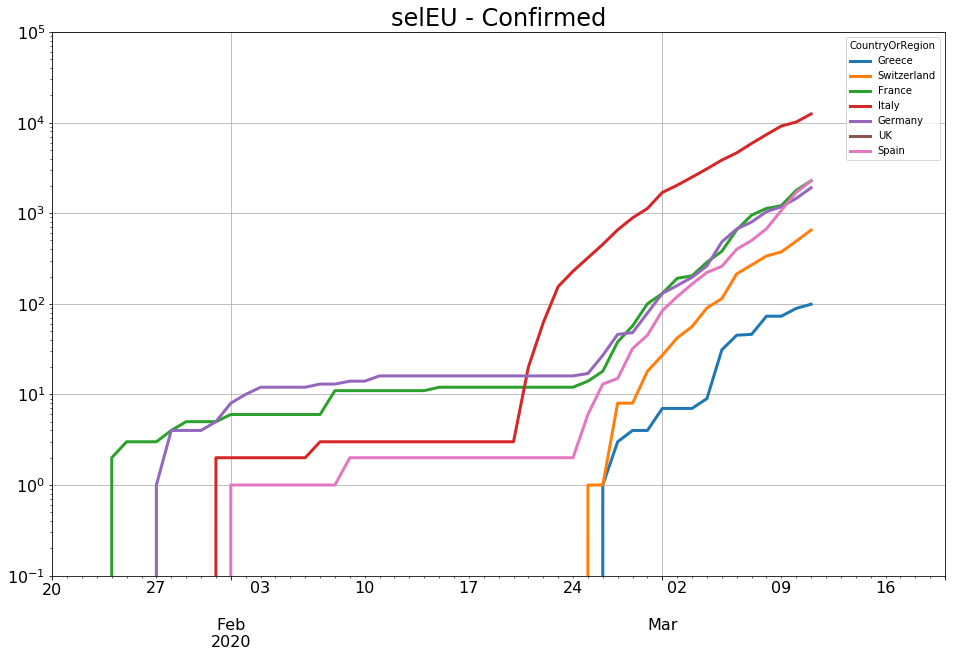

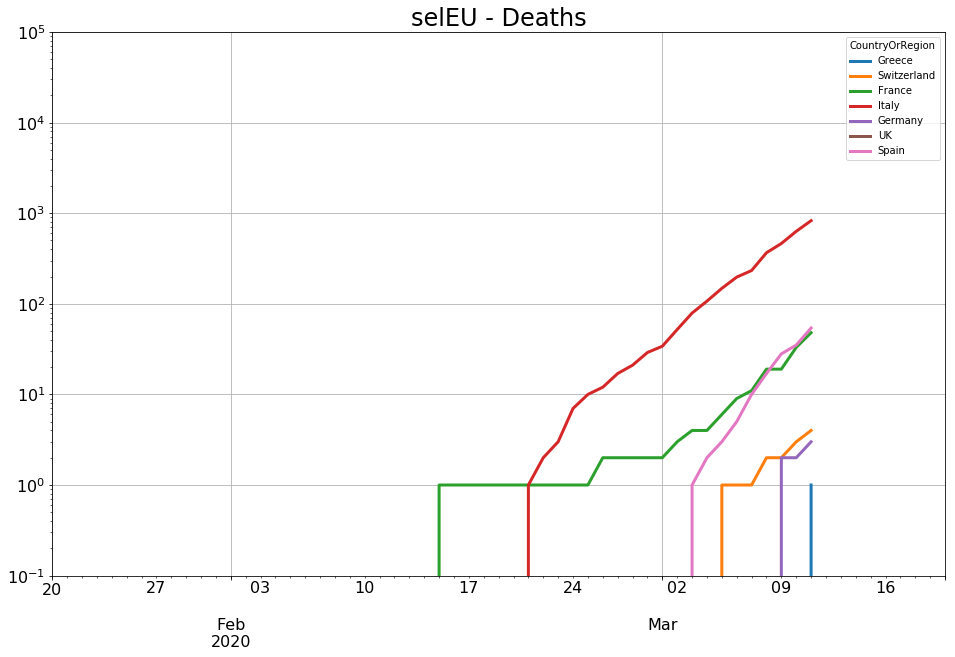

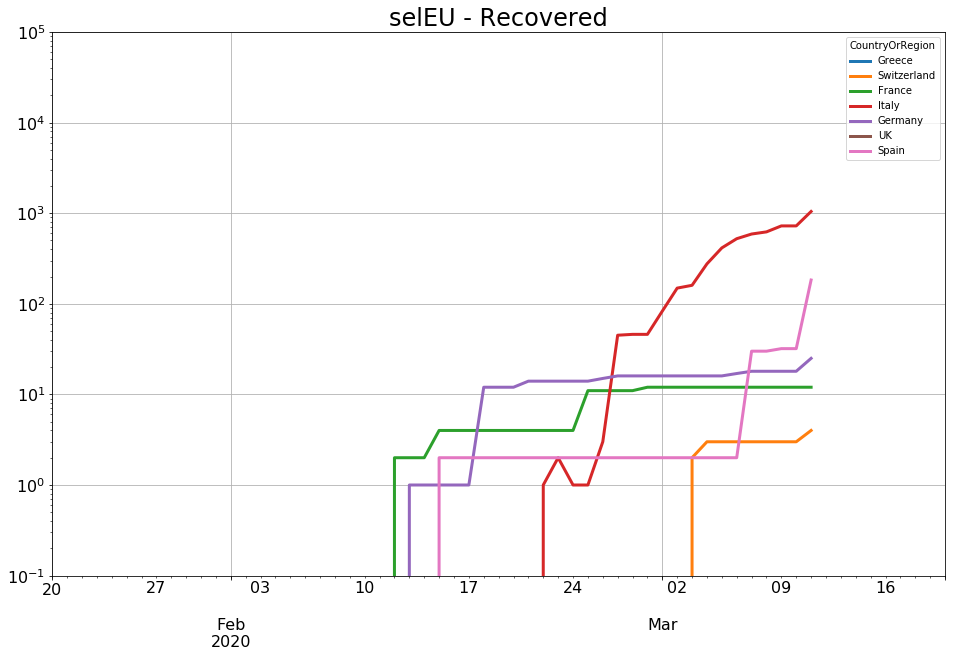

In [6]:
sel = ['Greece', 'Switzerland', 'France', 'Italy', 'Germany', 'UK', 'Spain']
name = 'selEU' 
plotOne( infoConf, sel, 'Confirmed', name)
plotOne( infoD, sel, 'Deaths', name )
r1=plotOne( infoRec, sel, 'Recovered', name )


CountryOrRegion,US,United Kingdom,China,Iran,Italy,Taiwan*,"Korea, South"
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,3.700000,5.120000,19242.820000,302.840000,109.080000,4.120000,29.920000
std,3.929221,5.833191,21144.801414,736.910715,241.649252,5.216301,59.651998
min,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,671.250000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,4.500000,10026.500000,0.000000,0.000000,2.000000,9.000000
75%,6.750000,8.000000,35479.250000,67.000000,45.750000,5.750000,22.000000
max,19.000000,19.000000,61644.000000,2959.000000,1045.000000,17.000000,288.000000


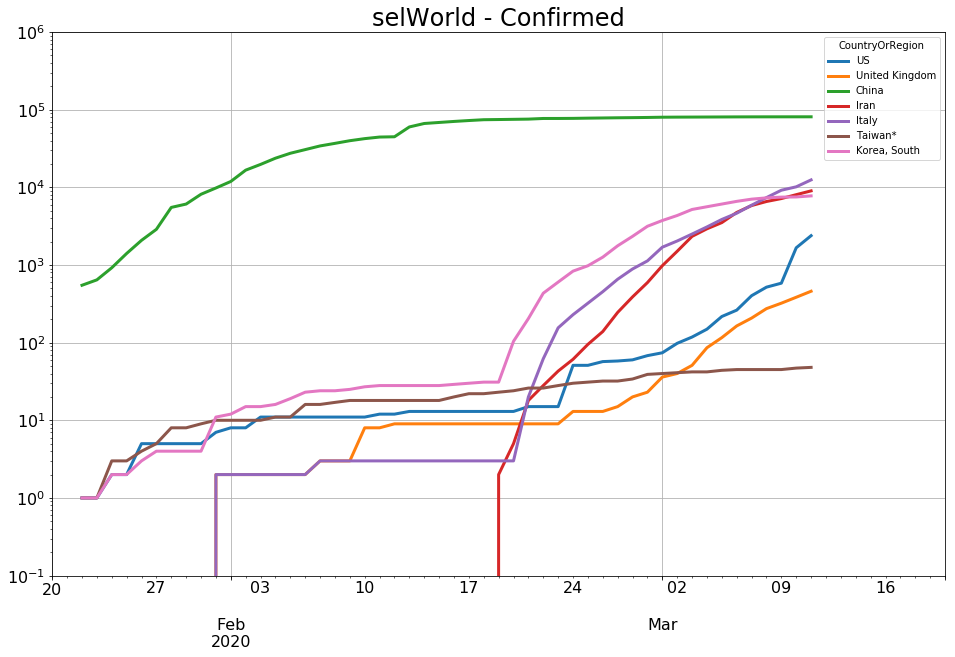

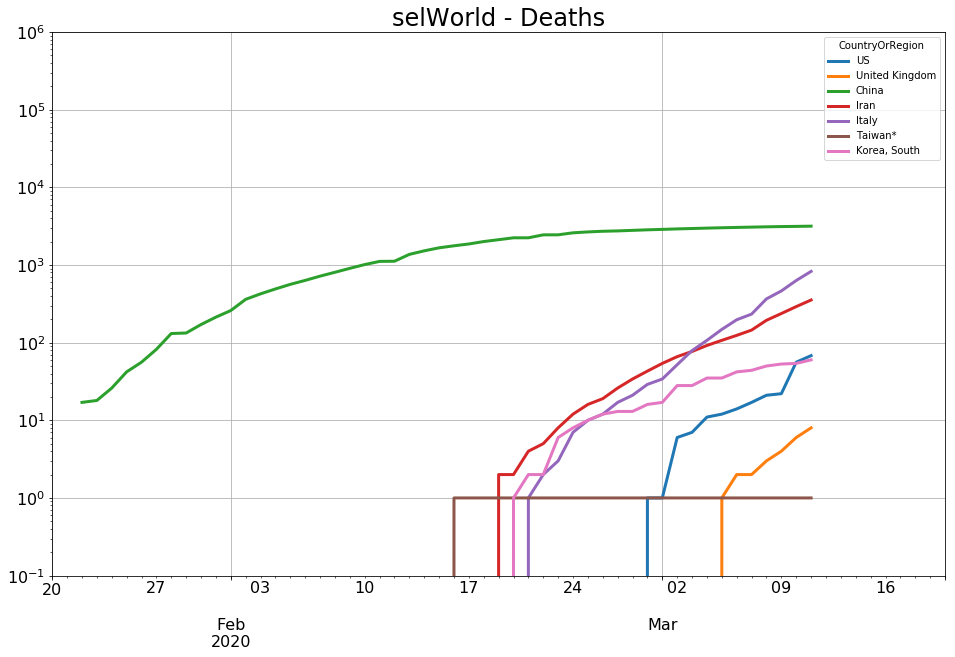

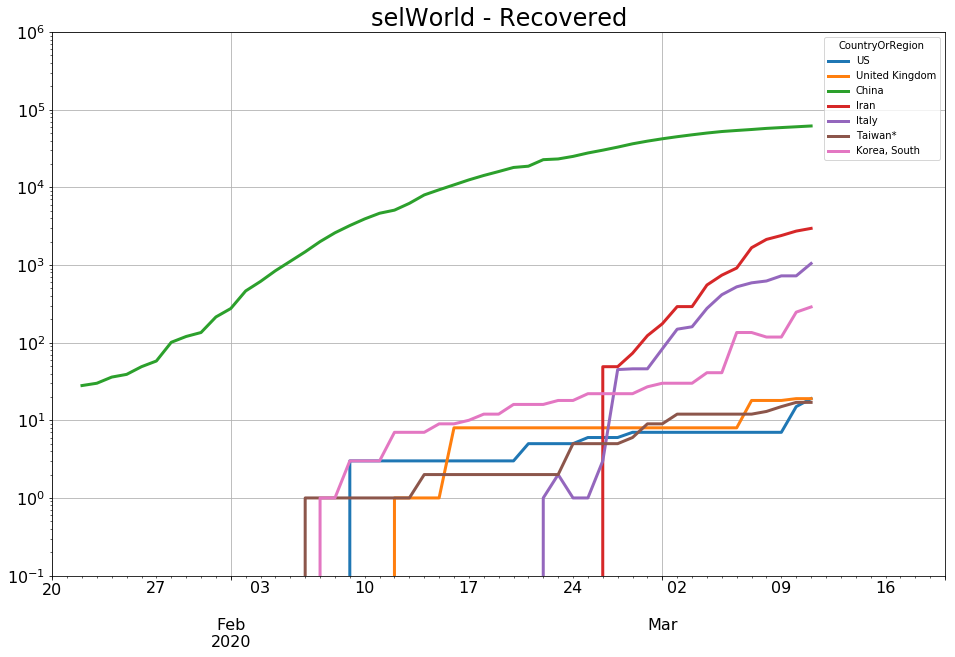

In [11]:
sel = ['US', 'United Kingdom', 'China', 'Iran', 'Italy', 'Taiwan*', 'Korea, South']
name = 'selWorld' 
yMax = 1.e6
plotOne( infoConf, sel, 'Confirmed', name, yMax=yMax)
plotOne( infoD, sel, 'Deaths', name, yMax=yMax)
r0=plotOne( infoRec, sel, 'Recovered', name, yMax=yMax )
r0.describe()